In [1]:
import pandas as pd

In [2]:
from dotenv import load_dotenv
load_dotenv('../../extractors/.env')

False

In [11]:
import boto3
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_common_model_additional_label_comedy_last_sports_30_perc.json", "preds_labels_common_model_additional_label_comedy_last_sports_30_perc.json")

In [12]:
df = pd.read_json("preds_labels_common_model_additional_label_comedy_last_sports_30_perc.json")

In [13]:
df.columns.tolist()

['sQDrj7JOAYQ',
 'u6g41E3RaYo',
 'uCSqeI29D_I',
 'VeYRaOV0I_Y',
 'w6OJl42Ntko',
 'WA4a8ouaars',
 'WA5_ledA_9k',
 'wdAva6xBjOQ',
 'xYQ28eu35gI',
 'YecCEmjLSmY',
 'YpjwHazhknA']

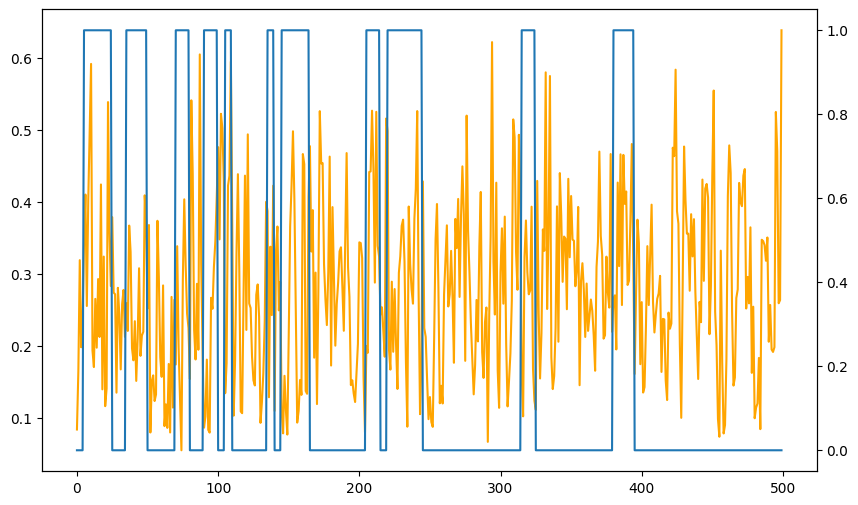

In [14]:
import matplotlib.pyplot as plt
vid_id = 'sQDrj7JOAYQ'
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange')
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'])


In [15]:
for col in df.columns.tolist():
    if len(df[col]['preds']) != len(df[col]['labels']):
        print(f"Skipping {col}")
        df = df.drop(col, axis=1)

Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


In [16]:
from importlib import reload
import metrics as m
reload(m)

mc = m.MetricCalculator(df)
mc.metrics # 0.556045

2024-10-05 14:27:10.125 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:27:10.126 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:27:10.128 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:28:03.019 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:28:03.026 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:28:03.031 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:28:03.031 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:28:03.037 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


,index,threshold,value
0,f1,0.071712,0.451107
1,accuracy,0.620534,0.711556
2,precision,0.700691,0.600000
3,recall,0.018690,1.000000
4,kappa,0.390751,0.104575
0,roc_auc,NaN,0.552437
1,average_precision,NaN,0.353848
0,accuracy_top5,0.569774,0.622222
1,f1_top5,0.569774,0.767123
2,kappa_top5,0.569774,0.000000


In [17]:
import metrics as m

all_metrics = []

for obj in boto3.resource("s3").Bucket("auto-shorts").objects.filter(Prefix="data/").all():
    if not obj.key.startswith('data/videos/') and obj.key.endswith('.json'):
        highlight_rt = obj.key[:-5].split("/")[-1]
        boto3.resource("s3").Bucket("auto-shorts").download_file(f"data/{highlight_rt}.json", f"{highlight_rt}.json")
        df = pd.read_json(f"{highlight_rt}.json")
        for col in df.columns.tolist():
            if len(df[col]['preds']) != len(df[col]['labels']):
                print(f"Skipping {col}")
                df = df.drop(col, axis=1)
        all_metrics.append(m.MetricCalculator(df).metrics.assign(highlight_ratio=highlight_rt))
        print(f"Done with {highlight_rt}")

2024-10-05 14:28:04.743 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:28:04.745 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:28:04.752 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:31:29.445 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:31:29.450 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:31:29.458 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:31:29.459 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:31:29.464 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_10_perc


2024-10-05 14:31:30.008 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:31:30.009 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:31:30.013 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:34:52.650 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:34:52.652 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:34:52.659 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:34:52.660 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:34:52.664 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_15_perc


2024-10-05 14:34:53.247 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:34:53.248 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:34:53.260 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:38:18.615 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:38:18.619 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:38:18.627 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:38:18.627 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:38:18.633 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_1_5_std


2024-10-05 14:38:19.198 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:38:19.199 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:38:19.204 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:42:38.025 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:42:38.057 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:42:38.074 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:42:38.075 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:42:38.138 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_1_std


2024-10-05 14:42:38.897 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:42:38.899 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:42:38.907 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:46:20.417 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:46:20.434 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:46:20.443 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:46:20.444 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:46:20.451 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_20_perc


2024-10-05 14:46:21.028 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:46:21.031 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:46:21.039 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:50:34.664 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:50:34.694 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:50:34.713 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:50:34.714 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:50:34.722 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_25_perc


2024-10-05 14:50:35.396 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:50:35.398 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:50:35.401 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:54:25.239 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:54:25.243 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:54:25.253 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:54:25.256 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:54:25.268 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_2_5_std


2024-10-05 14:54:25.902 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:54:25.904 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:54:25.910 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:58:12.907 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 14:58:12.909 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 14:58:12.917 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 14:58:12.918 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 14:58:12.929 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_2_std


2024-10-05 14:58:13.682 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 14:58:13.683 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 14:58:13.687 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:02:16.496 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:02:16.502 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:02:16.514 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:02:16.516 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:02:16.523 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_30_perc


2024-10-05 15:02:17.175 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:02:17.176 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:02:17.182 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:06:15.547 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:06:15.551 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:06:15.560 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:06:15.560 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:06:15.565 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_3_perc_1k_epochs


2024-10-05 15:06:16.084 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:06:16.085 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:06:16.097 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:09:45.051 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:09:45.058 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:09:45.066 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:09:45.067 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:09:45.072 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_3_perc_20_epochs


2024-10-05 15:09:50.532 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:09:50.532 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:09:50.535 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:10:46.561 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:10:46.564 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:10:46.571 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:10:46.571 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:10:46.576 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_10_perc


2024-10-05 15:10:47.232 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:10:47.233 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:10:47.237 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:11:44.978 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:11:44.981 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:11:44.987 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:11:44.987 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:11:44.992 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_15_perc


2024-10-05 15:11:45.664 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:11:45.665 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:11:45.669 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:12:40.171 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:12:40.175 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:12:40.181 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:12:40.181 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:12:40.186 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_1_5_std


2024-10-05 15:12:40.781 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:12:40.783 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:12:40.786 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:13:36.586 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:13:36.594 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:13:36.605 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:13:36.607 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:13:36.634 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_1_std


2024-10-05 15:13:37.276 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:13:37.277 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:13:37.280 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:14:31.318 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:14:31.321 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:14:31.327 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:14:31.328 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:14:31.334 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_20_perc


2024-10-05 15:14:32.085 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:14:32.086 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:14:32.089 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:15:28.843 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:15:28.847 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:15:28.852 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:15:28.853 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:15:28.861 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_25_perc


2024-10-05 15:15:29.432 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:15:29.433 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:15:29.437 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:16:29.092 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:16:29.096 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:16:29.101 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:16:29.101 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:16:29.106 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_2_5_std


2024-10-05 15:16:29.740 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:16:29.741 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:16:29.745 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:17:27.425 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:17:27.430 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:17:27.439 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:17:27.439 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:17:27.445 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_2_std


2024-10-05 15:17:28.271 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:17:28.271 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:17:28.276 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:18:25.931 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:18:25.935 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:18:25.942 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:18:25.943 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:18:25.948 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_30_perc


2024-10-05 15:18:26.513 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:18:26.514 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:18:26.516 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:19:24.771 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:19:24.773 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:19:24.777 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:19:24.778 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:19:24.783 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_3_perc


2024-10-05 15:19:25.620 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:19:25.622 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:19:25.629 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:23:19.654 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:23:19.662 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:23:19.677 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:23:19.677 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:23:19.684 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_comedy_model_on_sports_vids_30_perc


2024-10-05 15:23:20.246 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:23:20.247 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:23:20.251 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:24:15.860 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:24:15.864 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:24:15.870 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:24:15.870 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:24:15.875 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_additional_label_comedy_30_perc


2024-10-05 15:24:16.530 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:24:16.531 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:24:16.534 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:25:16.972 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:25:16.976 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:25:16.981 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:25:16.982 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:25:16.994 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_additional_label_comedy_last_sports_30_perc


2024-10-05 15:25:17.546 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:25:17.548 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:25:17.556 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:29:07.353 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:29:07.373 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:29:07.383 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:29:07.383 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:29:07.397 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_additional_label_sports_30_perc


2024-10-05 15:29:08.021 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:29:08.053 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:29:08.085 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:32:59.809 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:32:59.814 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:32:59.824 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:32:59.825 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:32:59.830 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_additional_label_sports_last_sports_30_perc


2024-10-05 15:33:00.394 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:33:00.394 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:33:00.396 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:33:59.568 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:33:59.573 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:33:59.583 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:33:59.583 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:33:59.590 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_balanced_comedy_vids_30_perc


2024-10-05 15:34:00.170 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:34:00.171 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:34:00.177 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:35:23.158 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:35:23.162 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:35:23.173 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:35:23.177 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:35:23.189 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_balanced_sports_vids_30_perc


2024-10-05 15:35:23.717 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:35:23.718 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:35:23.722 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:36:20.636 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:36:20.640 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:36:20.646 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:36:20.646 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:36:20.651 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_comedy_vids_30_perc


2024-10-05 15:36:34.569 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:36:34.571 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:36:34.585 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:40:24.943 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:40:24.946 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:40:24.956 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:40:24.957 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:40:24.969 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_common_model_sport_vids_30_perc


2024-10-05 15:40:25.482 | INFO     | metrics:extract_labels_preds:54 - Extracting labels and preds from DataFrame
2024-10-05 15:40:25.488 | INFO     | metrics:extract_labels_preds_top_k:38 - Extracting labels and preds for top 5 moments from DataFrame
2024-10-05 15:40:25.492 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold


Skipping u6g41E3RaYo
Skipping YecCEmjLSmY


2024-10-05 15:41:23.371 | INFO     | metrics:maximize_class_metrics:120 - Maximizing class metrics
2024-10-05 15:41:23.374 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold
2024-10-05 15:41:23.380 | INFO     | metrics:get_top_k_metrics:105 - Calculating metrics for top 5 moments
2024-10-05 15:41:23.380 | INFO     | metrics:calculate_class_pred_metrics:64 - Calculating class metrics for each threshold
2024-10-05 15:41:23.386 | INFO     | metrics:calculate_pred_metrics:77 - Calculating metrics for each threshold


Done with preds_labels_sports_model_on_comedy_vids_30_perc


In [18]:
all_metrics = pd.concat(all_metrics)
all_metrics
# all_metrics.to_csv("../data/metrics_sport_vids.csv", index=False)

,index,threshold,value,highlight_ratio
0,f1,7.302340e-02,0.188285,preds_labels_10_perc
1,accuracy,9.999661e-01,0.907263,preds_labels_10_perc
2,precision,9.917676e-01,0.248408,preds_labels_10_perc
3,recall,3.358031e-08,1.000000,preds_labels_10_perc
4,kappa,6.668185e-01,0.090101,preds_labels_10_perc
...,...,...,...,...
2,kappa_top5,8.052601e-01,0.000000,preds_labels_sports_model_on_comedy_vids_30_perc
3,precision_top5,8.052601e-01,0.355556,preds_labels_sports_model_on_comedy_vids_30_perc
4,recall_top5,8.052601e-01,1.000000,preds_labels_sports_model_on_comedy_vids_30_perc
0,roc_auc_top5,NaN,0.459052,preds_labels_sports_model_on_comedy_vids_30_perc


In [19]:
all_metrics[(all_metrics['index'] == 'average_precision') | (all_metrics['index'] == 'average_precision_top5')]

,index,threshold,value,highlight_ratio
1,average_precision,NaN,0.129459,preds_labels_10_perc
1,average_precision_top5,NaN,0.243900,preds_labels_10_perc
1,average_precision,NaN,0.190677,preds_labels_15_perc
1,average_precision_top5,NaN,0.519450,preds_labels_15_perc
1,average_precision,NaN,0.088365,preds_labels_1_5_std
...,...,...,...,...
1,average_precision_top5,NaN,0.571007,preds_labels_common_model_comedy_vids_30_perc
1,average_precision,NaN,0.358198,preds_labels_common_model_sport_vids_30_perc
1,average_precision_top5,NaN,0.656074,preds_labels_common_model_sport_vids_30_perc
1,average_precision,NaN,0.313802,preds_labels_sports_model_on_comedy_vids_30_perc


In [20]:
all_metrics[(all_metrics['index'] == 'f1') | (all_metrics['index'] == 'f1_top5')]

,index,threshold,value,highlight_ratio
0,f1,0.073023,0.188285,preds_labels_10_perc
1,f1_top5,0.836633,0.416667,preds_labels_10_perc
0,f1,0.000797,0.261606,preds_labels_15_perc
1,f1_top5,0.903895,0.571429,preds_labels_15_perc
0,f1,0.010807,0.145251,preds_labels_1_5_std
...,...,...,...,...
1,f1_top5,0.738391,0.695652,preds_labels_common_model_comedy_vids_30_perc
0,f1,0.044189,0.454125,preds_labels_common_model_sport_vids_30_perc
1,f1_top5,0.776872,0.680556,preds_labels_common_model_sport_vids_30_perc
0,f1,0.002081,0.451289,preds_labels_sports_model_on_comedy_vids_30_perc


In [21]:
all_metrics.to_csv("../data/metrics_balanced_models.csv", index=False)

In [22]:
metrics_sports = pd.read_csv("../data/metrics_sport_vids.csv")
metrics_sports[(metrics_sports['index'] == 'average_precision') | (metrics_sports['index'] == 'average_precision_top5')]

,index,threshold,value,highlight_ratio
6,average_precision,NaN,0.129459,preds_labels_10_perc
13,average_precision_top5,NaN,0.243900,preds_labels_10_perc
20,average_precision,NaN,0.190677,preds_labels_15_perc
27,average_precision_top5,NaN,0.519450,preds_labels_15_perc
34,average_precision,NaN,0.213430,preds_labels_20_perc
41,average_precision_top5,NaN,0.432466,preds_labels_20_perc
48,average_precision,NaN,0.241969,preds_labels_25_perc
55,average_precision_top5,NaN,0.349986,preds_labels_25_perc
62,average_precision,NaN,0.322803,preds_labels_30_perc
69,average_precision_top5,NaN,0.658278,preds_labels_30_perc


In [23]:
metrics_sports[(metrics_sports['index'] == 'f1') | (metrics_sports['index'] == 'f1_top5')]


,index,threshold,value,highlight_ratio
0,f1,7.302340e-02,0.188285,preds_labels_10_perc
8,f1_top5,8.366333e-01,0.416667,preds_labels_10_perc
14,f1,7.974493e-04,0.261606,preds_labels_15_perc
22,f1_top5,9.038951e-01,0.571429,preds_labels_15_perc
28,f1,8.189845e-06,0.322532,preds_labels_20_perc
36,f1_top5,9.654601e-01,0.515625,preds_labels_20_perc
42,f1,4.917386e-07,0.387509,preds_labels_25_perc
50,f1_top5,9.972608e-01,0.480000,preds_labels_25_perc
56,f1,1.460427e-08,0.451618,preds_labels_30_perc
64,f1_top5,9.982424e-01,0.689655,preds_labels_30_perc


In [16]:
boto3.resource("s3").Bucket("auto-shorts").download_file("data/preds_labels_comedy_10_perc.json", "preds_labels_comedy_10_perc.json")
df = pd.read_json("preds_labels_comedy_10_perc.json")

In [17]:
df.columns

Index(['sQDrj7JOAYQ', 'u6g41E3RaYo', 'uCSqeI29D_I', 'VeYRaOV0I_Y',
       'w6OJl42Ntko', 'WA4a8ouaars', 'WA5_ledA_9k', 'wdAva6xBjOQ',
       'xYQ28eu35gI', 'YecCEmjLSmY', 'YpjwHazhknA'],
      dtype='object')

In [7]:
import sys
import pandas as pd
sys.path.append('../auto_shorts/upload/db')
from utils import postgres_engine
from collections import Counter


sQDrj7JOAYQ
100
Counter({0.0: 355, 1.0: 145})


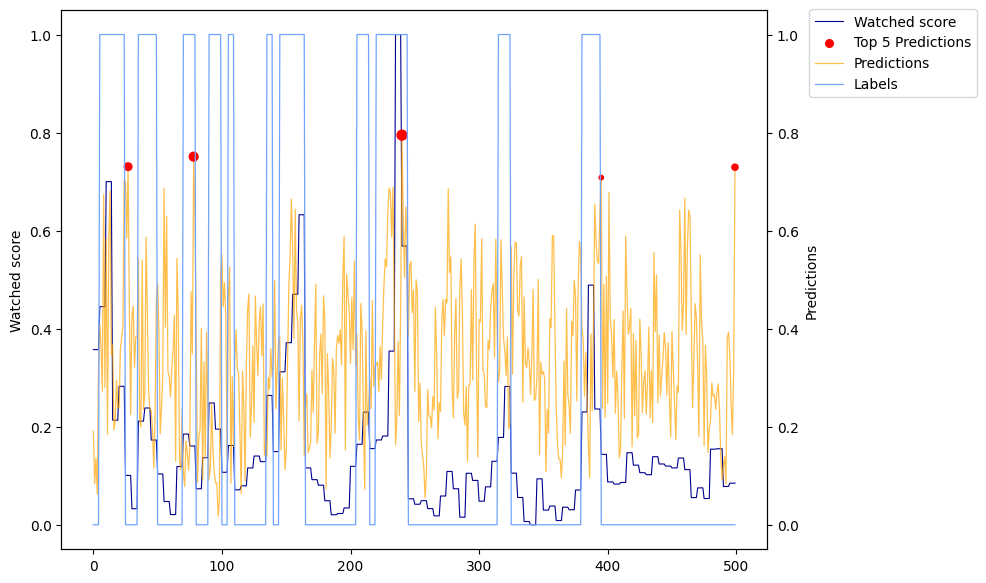

Skipping u6g41E3RaYo
uCSqeI29D_I
100
Counter({0.0: 355, 1.0: 145})


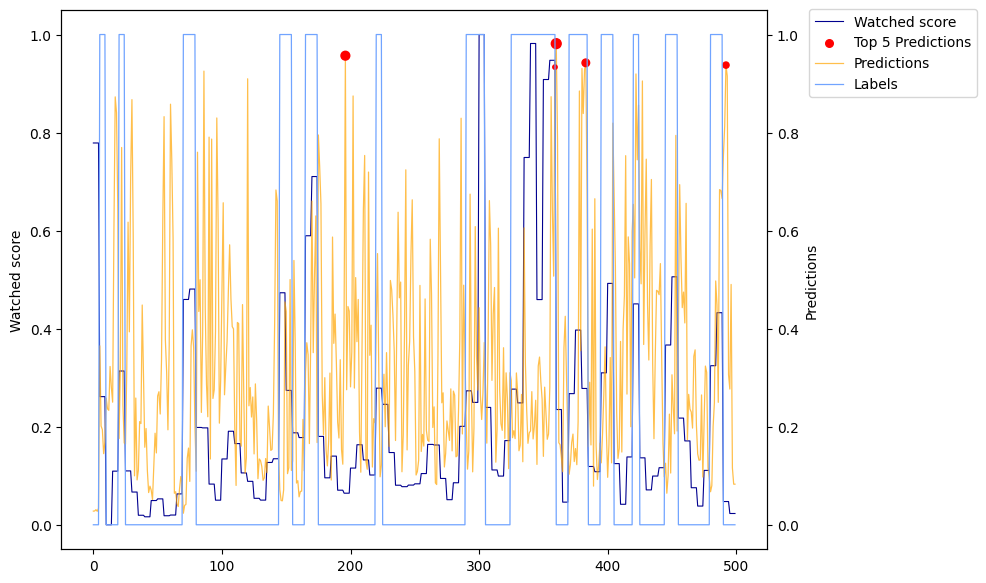

VeYRaOV0I_Y
100
Counter({0.0: 355, 1.0: 145})


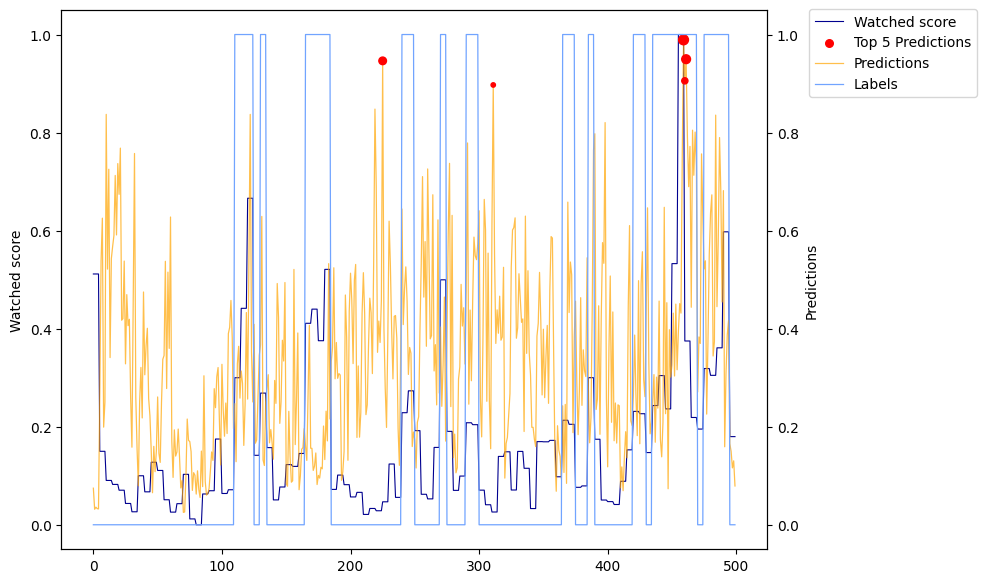

w6OJl42Ntko
100
Counter({0.0: 355, 1.0: 145})


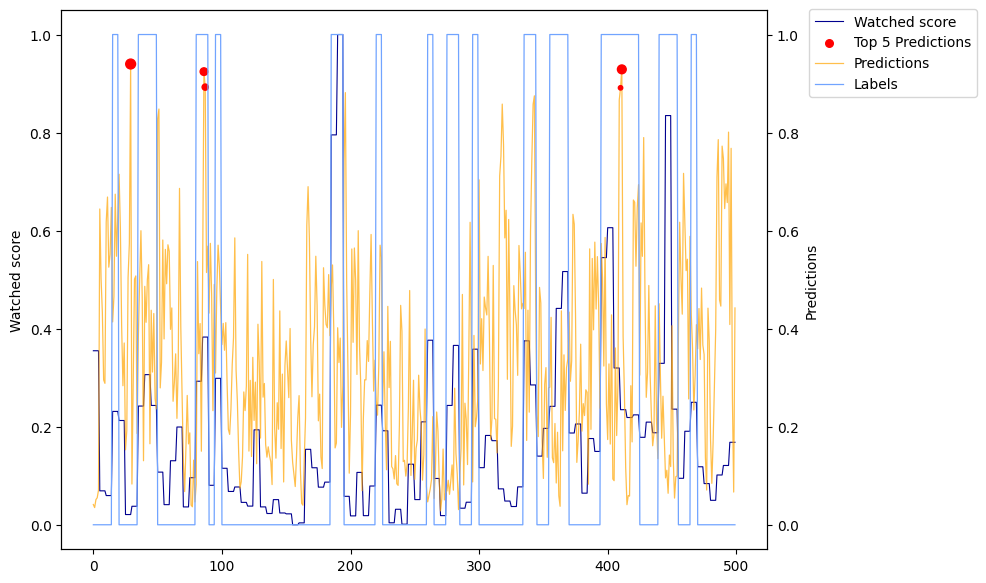

WA4a8ouaars
100
Counter({0.0: 355, 1.0: 145})


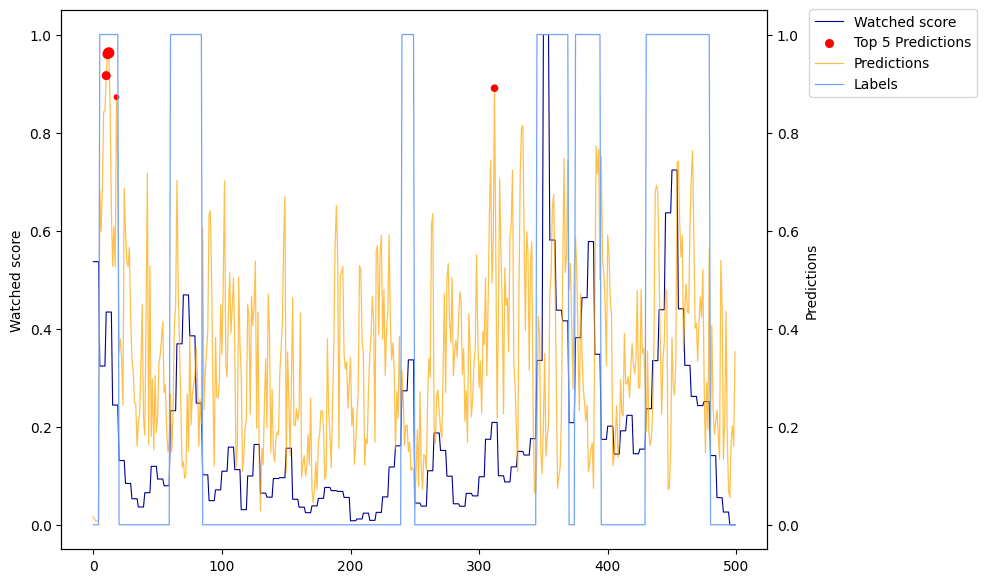

WA5_ledA_9k
100
Counter({0.0: 355, 1.0: 145})


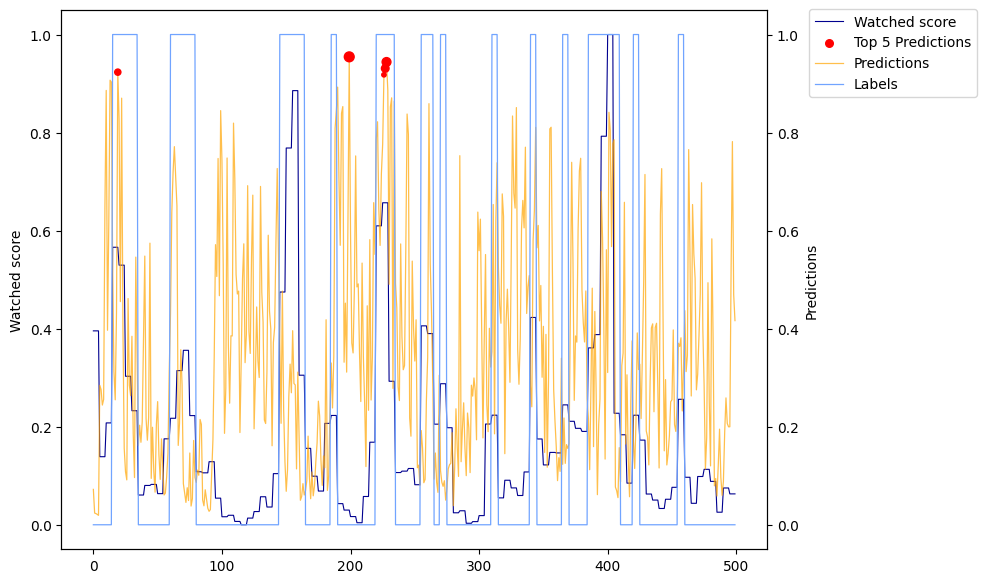

wdAva6xBjOQ
100
Counter({0.0: 355, 1.0: 145})


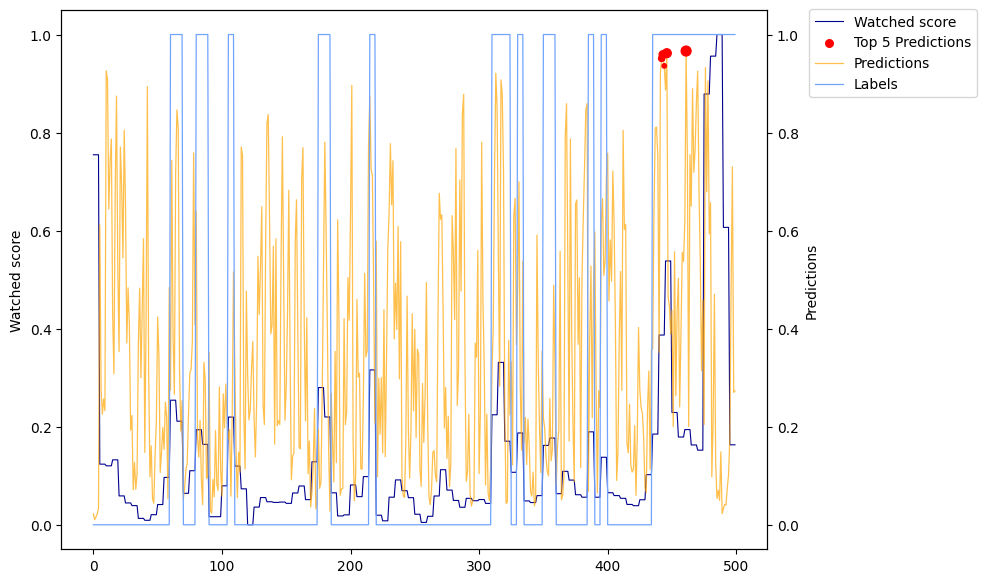

xYQ28eu35gI
100
Counter({0.0: 355, 1.0: 145})


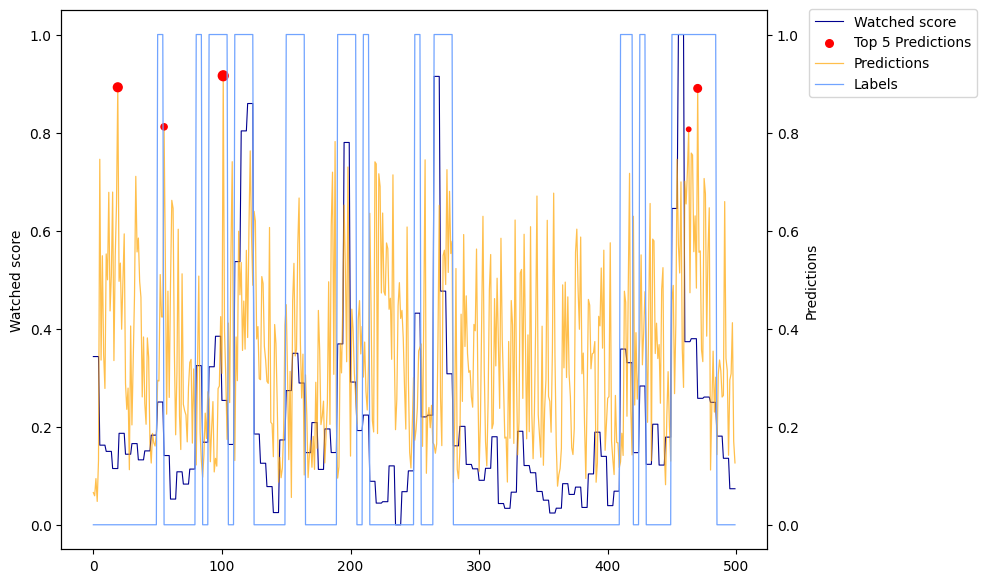

Skipping YecCEmjLSmY
YpjwHazhknA
100
Counter({0.0: 355, 1.0: 145})


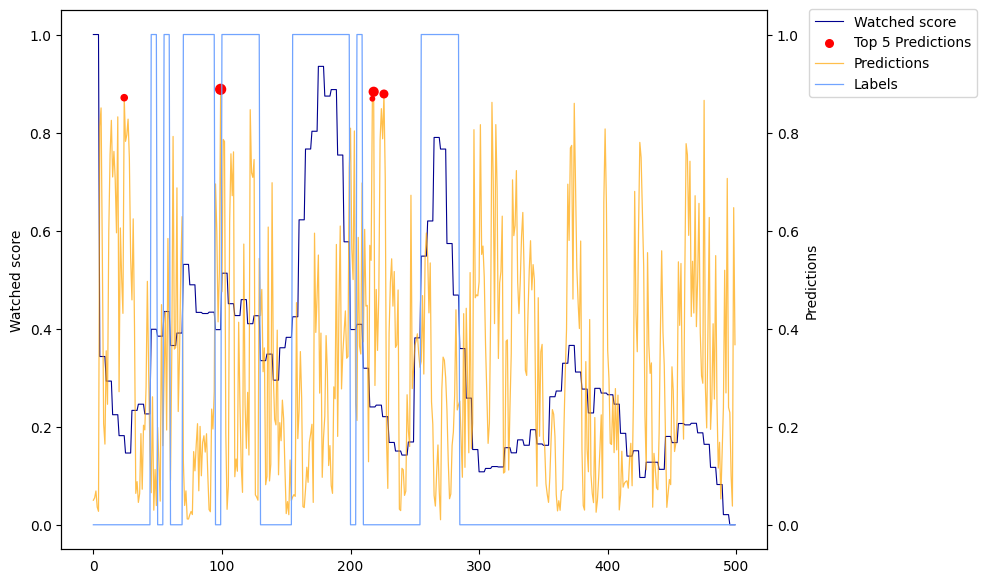

In [24]:
import boto3

model_id = "preds_labels_comedy_30_perc"
category = "sport"
percent = 30

# boto3.resource("s3").Bucket("auto-shorts").download_file(
#     f"data/{model_id}.json", f"{model_id}.json"
# )
df = pd.read_json(f"{model_id}.json")
for col in df.columns.tolist():
    if len(df[col]["preds"]) != len(df[col]["labels"]):
        print(f"Skipping {col}")
        # df = df.drop(col, axis=1)
        continue
    import json

    vid_path = pd.read_sql(
        "select s3_path from videos where id = %s", con=postgres_engine, params=(col,)
    ).iloc[0, 0]
    boto3.resource("s3").Bucket("auto-shorts").download_file(
        f"{vid_path}/video_data.json", "video_data.json"
    )
    with open("video_data.json") as f:
        moments = pd.DataFrame(json.load(f)["most_watched_moments"])
    watched_score = (
        pd.concat(
            [
                moments,
                moments.assign(time_start_ms=moments["time_start_ms"] + 1),
                moments.assign(time_start_ms=moments["time_start_ms"] + 2),
                moments.assign(time_start_ms=moments["time_start_ms"] + 3),
                moments.assign(time_start_ms=moments["time_start_ms"] + 4),
            ]
        )
        .sort_values("time_start_ms")
        .reset_index()["intensity_score"]
    )
    import heapq

    preds_vid = heapq.nlargest(5, df[col].loc["preds"])
    indices_vid = [df[col].loc["preds"].index(p) for p in preds_vid]
    import matplotlib.pyplot as plt

    fig, ax1 = plt.subplots(figsize=(10, 6))
    # plot preds on one axis and labels on second one
    (line1,) = ax1.plot(watched_score, color="#00008f", label="Watched score", linewidth=0.8)
    # plot preds on one axis and labels on second one
    (line2,) = ax1.plot(
        df[col]["preds"], color="orange", alpha=0.7, label="Predictions", linewidth=0.9
    )
    a = "#71a4ff"
    ax2 = ax1.twinx()
    (line3,) = ax2.plot(df[col]["labels"], alpha=1, label="Labels",  linewidth=0.9, color="#71a4ff")
    scatter = ax2.scatter(
        indices_vid,
        preds_vid,
        color="red",
        s=[50 - i * 10 for i in range(5)],
        label="Top 5 Predictions",
    )
    # add title
    print(col)
    print(len(set(watched_score)))
    print(Counter(df[col]["labels"]))
    # ax1.set_title(f"Labels and predictions for {category} video. Threshold is set at {percent}%")
    # add title for left axis
    ax1.set_ylabel("Watched score")
    # add title for right axis
    ax2.set_ylabel("Predictions")
    lines = [line1, scatter, line2, line3]
    labels = [handle.get_label() for handle in lines]

    # Create a combined legend
    ax1.legend(lines, labels, loc="center left", bbox_to_anchor=(1.05, 0.92))
    plt.tight_layout()
    plt.show()
    # ax1.legend(["Watched score", "Predictions"], loc='upper left')
    # ax2.legend(["Labels", "Top 5 Predictions"], loc='upper right')

In [ ]:
vid_id = 'p39rR4nLJV0'

In [ ]:
import json
vid_path = pd.read_sql('select s3_path from videos where id = %s', con=postgres_engine, params=(vid_id,)).iloc[0,0]
boto3.resource("s3").Bucket("auto-shorts").download_file(f"{vid_path}/video_data.json", "video_data.json")
with open("video_data.json") as f:
    moments = pd.DataFrame(
                    json.load(f)["most_watched_moments"]
                )
watched_score = pd.concat([moments, moments.assign(time_start_ms=moments['time_start_ms']+1), moments.assign(time_start_ms=moments['time_start_ms']+2), moments.assign(time_start_ms=moments['time_start_ms']+3), moments.assign(time_start_ms=moments['time_start_ms']+4)]).sort_values('time_start_ms').reset_index()['intensity_score']

In [ ]:
import heapq
preds_vid = heapq.nlargest(5, df[vid_id].loc["preds"])
indices_vid = [df[vid_id].loc["preds"].index(p) for p in preds_vid]

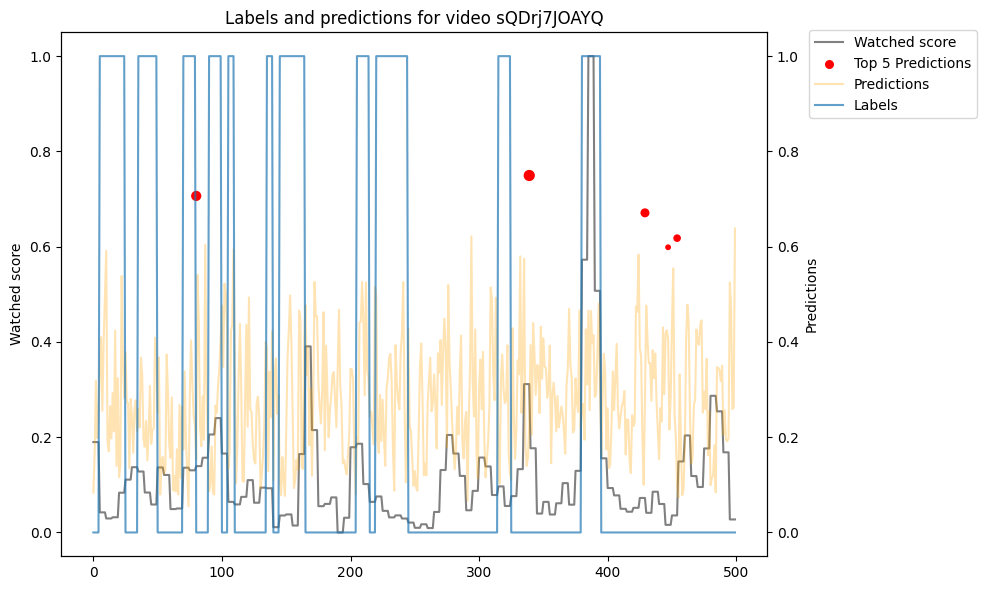

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
line1, =ax1.plot(watched_score, color='grey', label="Watched score")
# plot preds on one axis and labels on second one
line2, =ax1.plot(df[vid_id]['preds'], color='orange', alpha=0.3, label="Predictions")
ax2 = ax1.twinx()
line3, = ax2.plot(df[vid_id]['labels'], alpha=0.7, label="Labels")
scatter = ax2.scatter(indices_vid, preds_vid, color='red', s=[50-i*10 for i in range(5)], label="Top 5 Predictions")
# add title
ax1.set_title(f"Labels and predictions for video {vid_id}")
# add title for left axis
ax1.set_ylabel("Watched score")
# add title for right axis
ax2.set_ylabel("Predictions")
lines = [line1, scatter, line2, line3]
labels = [handle.get_label() for handle in lines]

# Create a combined legend
ax1.legend(lines, labels, loc="center left", bbox_to_anchor=(1.05, 0.92))
plt.tight_layout()
#ax1.legend(["Watched score", "Predictions"], loc='upper left')
#ax2.legend(["Labels", "Top 5 Predictions"], loc='upper right')

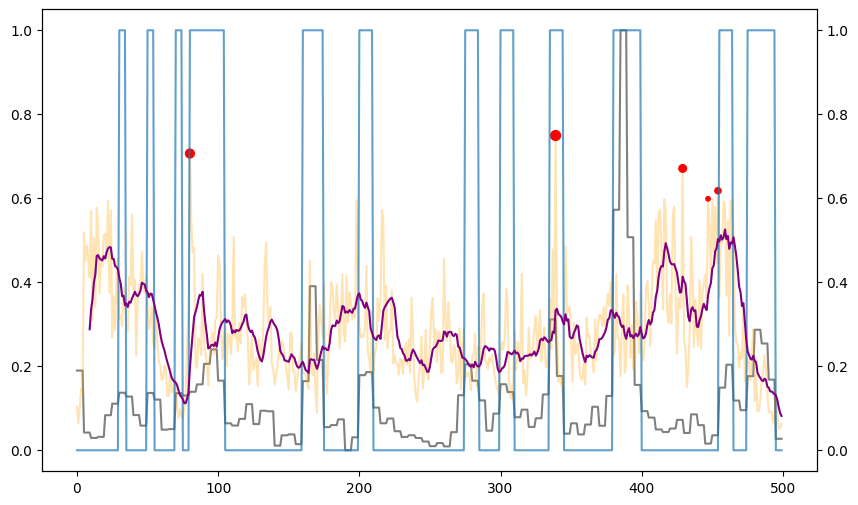

In [ ]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
# plot preds on one axis and labels on second one
ax1.plot(watched_score, color='grey')
# plot preds on one axis and labels on second one
ax1.plot(df[vid_id]['preds'], color='orange', alpha=0.3)
ax2 = ax1.twinx()
ax2.plot(df[vid_id]['labels'], alpha=0.7)
ax2.scatter(indices_vid, preds_vid, color='red', s=[50-i*10 for i in range(5)])
# add line plot of moving average of preds
ax2.plot(pd.Series(df[vid_id]['preds']).rolling(window=10).mean(), color='purple')